# CYCLISTIC BIKE-SHARE
 How does a bike-share navigate speedy success ?

![](https://miro.medium.com/max/293/1*nPqUTH1pkj8BWtQrd8WYIg.png)

### ABOUT THE COMPANY
Founded in 2016, Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, the company also has reclining bikes, hand tricycles, and cargo bikes included in its renting options. They can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders while customers who purchase annual memberships are known as members.

The company's finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps the company attract more customers, Lily Moreno – Cyclistic's marketing director – believes that maximizing the number of annual members will be key to future growth. Instead of creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

### BUSINESS TASK
Analyzing the company’s historical bike trip data to identify trends into how annual members and casual riders use Cyclistic bikes differently.

### STAKEHOLDERS
* Lily Moreno – Cyclistic’s marketing director.
* Cyclistic marketing analytics team – A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide the company’s marketing strategy. 
* Cyclistic executive team – Responsible for deciding whether to approve the recommended marketing program.

## ASK
* How do annual members and casual riders use Cyclistic bikes differently?

## PREPARE
The data used in this project has been made available by Motivate International Inc. under this license. The datasets are named differently because Cyclistic is a fictional company. Divvy, the name you will see on the files, is a real bike-share system in Chicago with over 600 stations and 6,000+ bikes across the city. For this reason, the data is quite appropriate and will help us explore how different customer types are using Cyclistic's bikes.

It is important to note, however, that data-privacy issues prohibit us to have access to the users' personal information, meaning we will not be able to connect pass purchases to credit card numbers in order to determine if casual riders live in the Cyclistic service area, or if they have purchased multiple single passes. You can check the datasets here.

We will be working with 12 CSV files, comprehending the datasets between ‘202005-divvy-tripdata’ and ‘202104-divvy-tripdata’. This data corresponds to the period between May 2020 and April 2021. On those files, we will find the types of bikes available for rental, the date and time of each bike rental and its return to the station, the different station names, and more. Considering our data limitations, we will not be able to find out whether a casual rider spends more money per year than they would on an annual membership, their gender, age, or neighborhood - but we can still use this dataset to explore trends and learn how casual riders and members differ in their bike rental habits.

## PROCESS
We will begin this phase by loading the libraries and datasets. Then, we will perform data exploration by getting an overview of the datasets, checking the data types, and cleaning the data.

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import datetime
from pandas.api.types import CategoricalDtype
import seaborn as sns

In [3]:
#Loading datasets
may_2020_tripdata = pd.read_csv('2021_05-divvy-tripdata.csv')
jun_2020_tripdata = pd.read_csv('2021_06-divvy-tripdata.csv')
jul_2020_tripdata = pd.read_csv('2021_07-divvy-tripdata.csv')
aug_2020_tripdata = pd.read_csv('2021_08-divvy-tripdata.csv')
sep_2020_tripdata = pd.read_csv('2021_09-divvy-tripdata.csv')
oct_2020_tripdata = pd.read_csv('2020_10-divvy-tripdata.csv')
nov_2020_tripdata = pd.read_csv('2020_11-divvy-tripdata.csv')
dec_2020_tripdata = pd.read_csv('2020_12-divvy-tripdata.csv')
jan_2021_tripdata = pd.read_csv('2021_01-divvy-tripdata.csv')
feb_2021_tripdata = pd.read_csv('2021_02-divvy-tripdata.csv')
mar_2021_tripdata = pd.read_csv('2021_03-divvy-tripdata.csv')
apr_2021_tripdata = pd.read_csv('2021_04-divvy-tripdata.csv')

### Data Exploration
### Getting an overview of the data
Let's start by taking a first look at a couple of our datasets:

In [4]:
may_2020_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.61,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.88,-87.62,41.79,-87.58,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.92,-87.70,41.92,-87.70,casual


In [5]:
jun_2020_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member


As we can see, the datasets contain the same columns. Since there are 12 datasets, we should combine them into only one. This will make it a lot easier to clean the data, make any transformations, and perform analysis.

In order to do this, we will use the concat() function. You can think of it as Python's version of a SQL UNION.

### Combining all of the datasets into one with concat()

In [6]:
tripdata = pd.concat([may_2020_tripdata, jun_2020_tripdata, jul_2020_tripdata, aug_2020_tripdata, sep_2020_tripdata,
                      oct_2020_tripdata, nov_2020_tripdata, dec_2020_tripdata, jan_2021_tripdata, feb_2021_tripdata,
                      mar_2021_tripdata, apr_2021_tripdata])

### Checking the data types in the dataset
Now, we should check the data types we will be working with:

In [7]:
tripdata.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### Taking a closer look at the dataset
The next step involves learning more about some of our dataset's characteristics, so we can understand its content better.

How many unique rides are there in total?

In [8]:
tripdata.ride_id.nunique()

5136052

How many types of bikes are there ?

In [9]:
tripdata.rideable_type.nunique()

3

How many columns are there in the dataframe ?

In [10]:
tripdata.shape

(5136261, 13)

## Cleaning Data
Now, it is time to make sure our data is clean and tidy.
### Checking for empty cells

In [11]:
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

We do have null values in our dataset. Let's see how many of them we are dealing with:

In [12]:
tripdata.isnull().values.sum()

2191659

As we can see above, there are null values in the following columns: start_station_name, start_station_id, end_station_name, end_station_id, end_lat, and end_lng.
Given that we will not be using those columns in our analysis, there is no need to be concerned about removing the null values. We can go ahead and drop the columns altogether.

### Dropping unnecessary columns

In [13]:
to_drop = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

tripdata.drop(to_drop, inplace=True, axis=1)

This is the result:

In [14]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,casual
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,casual
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,casual


### Looking for duplicate values

In [15]:
tripdata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
337225    False
337226    False
337227    False
337228    False
337229    False
Length: 5136261, dtype: bool

In [16]:
#No duplicate rows found.

## Analyze
Now, we will perform data transformation and change data formatting to perform analysis.

## Data Transformation
In this next step, we will transform certain aspects of the data in order to analyze them.

### Changing data formatting
When using dtypes, we learned that some of our columns are of type object. We need to change the data type from columns started_at and ended_at to datetime to perform calculations.

In [17]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

### Creating an hour column

In [18]:
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour':'int8'})

### Creating a day of the week column

In [19]:
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()

### Creating a month column

In [20]:
tripdata['month'] = tripdata['started_at'].dt.month_name()

### Creating a ride length column
This column will show us the ride length in minutes for each ride.

In [21]:
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')

### Removing outliers
Now, we will check for any rows with zero or negative values in the ride_length column and remove them.

In [22]:
tripdata[tripdata['ride_length'] <= 0].count()

ride_id          80845
rideable_type    80845
started_at       80845
ended_at         80845
member_casual    80845
hour             80845
dayofweek        80845
month            80845
ride_length      80845
dtype: int64

In [23]:
# removing rows with zero or negative values
tripdata = tripdata.drop(tripdata[tripdata.ride_length <= 0].index)

Our dataset is ready to be analyzed.

In [24]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,dayofweek,month,ride_length
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,casual,11,Sunday,May,12
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,casual,11,Sunday,May,44
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,casual,14,Sunday,May,1
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,casual,14,Sunday,May,15
7,48B60B250FE75AF9,electric_bike,2021-05-05 13:57:03,2021-05-05 14:14:58,casual,13,Wednesday,May,17


### Trip Data
We will now take a closer look at more specific information surrounding our dataframe. Since our business task is to find out how casual riders and members are using Cyclistic bikes differently, we are going to filter the data and create some pivot tables to compare the numbers from the two types of customers.

### Rides by Customer Type

In [25]:
df = tripdata.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,2101122
member,2458512


### Average Ride Length

In [26]:
arl = tripdata.groupby('member_casual', as_index=True)[['ride_length']].mean()
arl

,ride_length
member_casual,
casual,32.812066
member,13.904863


### The Most Popular Rideable Type

In [27]:
rt_pivot = pd.pivot_table(tripdata, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1008020
              member         1442288
docked_bike   casual          364919
              member          237540
electric_bike casual          728183
              member          778684
total count                  4559634

### The Most Popular Day of the Week for Bike Rentals

In [28]:
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          302488
            member          358775
Monday      casual          237360
            member          332565
Saturday    casual          466452
            member          353626
Sunday      casual          397053
            member          305443
Thursday    casual          244734
            member          372724
Tuesday     casual          223815
            member          360378
Wednesday   casual          229220
            member          375001
total count                4559634

### The Most Popular Month for Bike Rentals

In [29]:
pm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          118207
            member          174330
August      casual          373087
            member          355542
December    casual           24592
            member           83616
February    casual            7770
            member           30391
January     casual           14633
            member           63672
July        casual          402833
            member          342936
June        casual          334754
            member          322813
March       casual           71301
            member          122374
May         casual          229045
            member          243625
November    casual           72556
            member          149209
October     casual          122918
            member          217208
September   casual          329426
            member          352796
total count                4559634

### Average Ride Length by Day of the Week
Let's look into how long the rides last – in minutes – by day of the week.

In [30]:
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          31.418499
                       member          13.738677
Monday                 casual          32.566780
                       member          13.394551
Saturday               casual          35.537845
                       member          15.537429
Sunday                 casual          38.103820
                       member          15.846620
Thursday               casual          28.355803
                       member          13.013348
Tuesday                casual          29.413489
                       member          13.039323
Wednesday              casual          28.268210
                       member          13.113216
total ride_length mean                 22.617479

### Average Ride Length by Month
Let's also check the average ride length – in minutes – by month.

In [31]:
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          37.605429
                       member          14.422589
August                 casual          28.767671
                       member          13.837710
December               casual          26.590395
                       member          12.447163
February               casual          53.067181
                       member          18.087394
January                casual          23.734026
                       member          12.549802
July                   casual          32.810621
                       member          13.997693
June                   casual          37.354693
                       member          14.449099
March                  casual          38.179969
                       member          13.661023
May                    casual          37.801768
                       member          14.394286
November               casual          32.815673
                       member          13.320202
October                casual          30.746441
                       member          13.742367
September              casual          27.586972
                       member          13.452165
total ride_length mean                 22.617479

### Total Number of Rides per Hour

In [32]:
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           43299
                    member           24554
1                   casual           31111
                    member           16008
2                   casual           19965
                    member            9130
3                   casual           11076
                    member            5196
4                   casual            7799
                    member            6246
5                   casual            9694
                    member           23327
6                   casual           20479
                    member           66423
7                   casual           36364
                    member          118717
8                   casual           50158
                    member          132732
9                   casual           61167
                    member          102837
10                  casual           85485
                    member          103276
11                  casual          112469
                    member          126095
12                  casual          136228
                    member          147678
13                  casual          146142
                    member          145296
14                  casual          151412
                    member          144188
15                  casual          158939
                    member          163645
16                  casual          173554
                    member          208761
17                  casual          199743
                    member          259996
18                  casual          179694
                    member          220873
19                  casual          138839
                    member          157685
20                  casual          102395
                    member          104706
21                  casual           85482
                    member           75077
22                  casual           78962
                    member           56880
23                  casual           60666
                    member           39186
total ride_id count                4559634

### SHARE
We will now visualize the information we have discovered through our analysis.

### Visualizing Rides by User Type

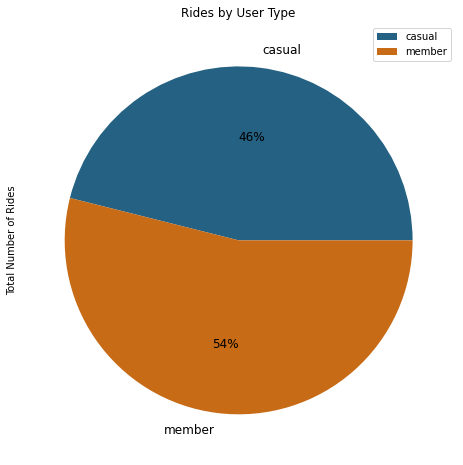

In [33]:
df['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

This pie chart shows us that annual members represent the majority of Cyclistic's bike-sharing system users, making up for 59% of total users.

### Visualizing Average Ride Length

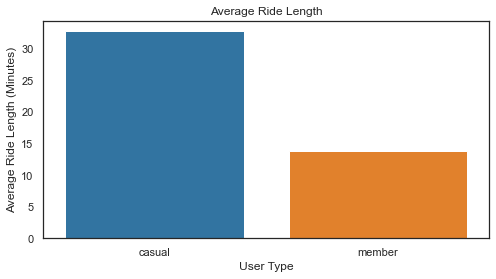

In [34]:
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

The column chart above shows us that casual riders have a much greater ride length average than members. The average ride length is 44 minutes for casual riders and 16 minutes for members.

### Visualizing the Most Popular Rideable Type

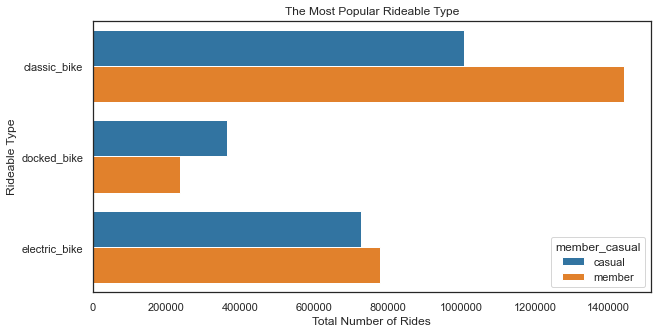

In [35]:
df2 = tripdata[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

According to our dataset, Cyclistic's bikes are divided into three groups: classic bike, docked bike, and electric bike. It is clear in the visualization that docked bike is the most rented rideable type by both casual riders and members. This could either be explained by the users showing a preference for the docked type or, more plausibly, the company has invested more heavily in a docked-based system rather than the other two options.

###  Visualizing the Most Popular Day of the Week for Bike Rentals

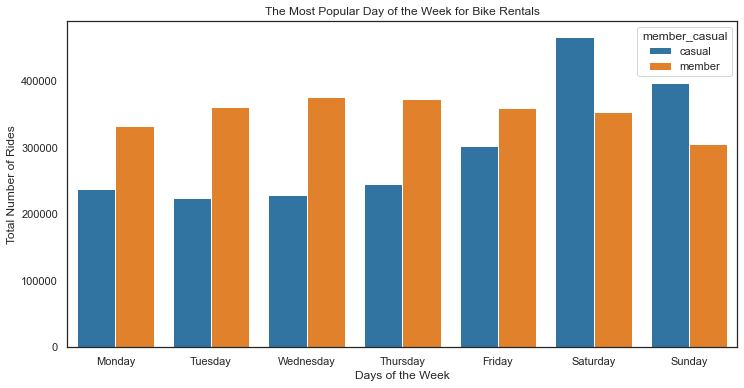

In [36]:
df3 = tripdata[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

When it comes to bike rentals by day of the week, there are similarities and differences between casual riders and members. For instance, Saturday is the most popular day for both user types, and on Sunday their number of rides is very much the same. On the other hand, the two groups differ considerably when it comes to bike rentals throughout the weekdays: members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.

### Visualizing the Most Popular Month of the Year for Bike Rentals

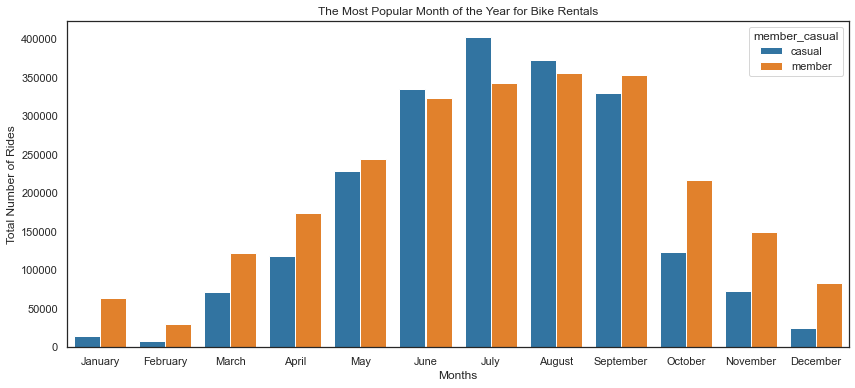

In [37]:
df4 = tripdata[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=df4, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

Visualizing the number of rides per month can help us learn if seasonality plays a role in bike rental. The chart above shows us that the number of rentals increases during the summer months and gradually drops over the fall and winter for both user types. The main difference is that members are still more consistent with their rental habits throughout the year when compared to casual riders, whose numbers drop significantly during the winter months.

### Visualizing Average Ride Length by Day of the Week

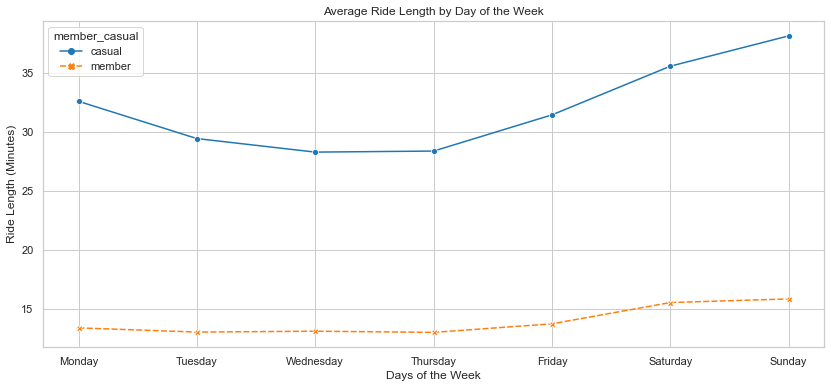

In [38]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

On this line plot, it becomes clear that ride length increases on the weekends for the two groups. The difference between casual riders and members in this scenario lies in the duration of rides. Casual riders tend to take longer rides, averaging 44 minutes. In contrast, members present much shorter rides that last 16 minutes on average.

Considering the lack of personal user data for privacy reasons, it is difficult for us to determine exactly what causes casual riders and members to have such different riding lengths. It is likely that members live close to work/school and choose to commute using Cyclistic's bike-sharing system. As for casual riders, if we take into consideration that they purchase either single-ride or full-day passes, this makes them less likely to use the service on a daily basis as members do. Casual riders could have longer ride lengths because they are using it for leisure or tourism. Regardless, we are unable to answer this question with certainty ride length increases on the weekends for the two groups given the gaps in our data.

### Visualizing Average Ride Length by Month

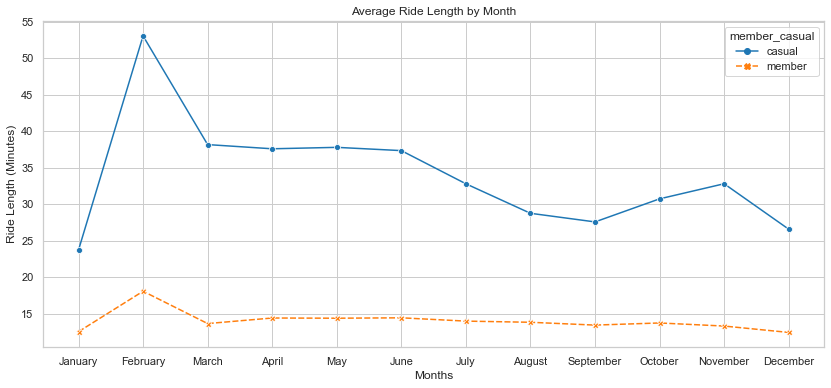

In [39]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

When we visualize ride length by month, we can learn more about the user's riding habits throughout the year. Note that the ride length changes considerably for casual riders as the months go by. For this type of customer, the ride length peaks during the summer – reaching an average of 60 minutes in July – before dropping in August. As for the members, the ride length does not change drastically over the months, peaking in May – averaging 18 minutes – and then gradually dropping for the remainder of the year.

Considering the short trips, this could indicate that members use Cyclistic's bikes to commute and, perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism – as mentioned earlier – especially during the spring and summer.

### Visualizing the Total Number of Rides per Hour

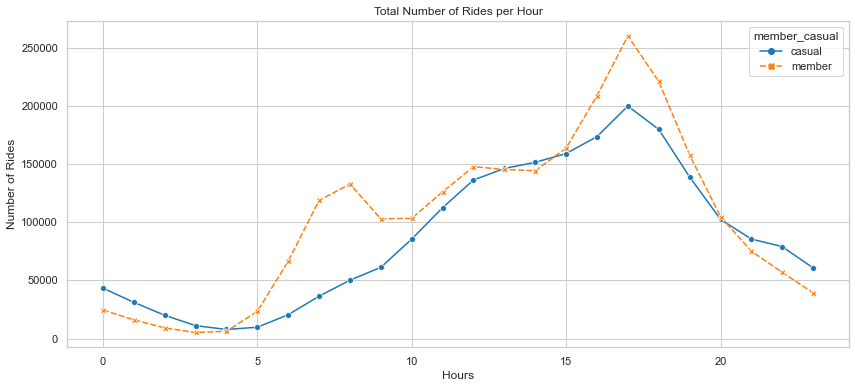

In [40]:
df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

By taking a closer look into the total number of rides per hour, we can find more patterns in the customers' bike rental habits. The number of bike rentals by casual riders begins to increase between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm. Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.

## ACT
Now, it is time to summarize our key findings and present our recommendations for Cyclistic's marketing team.

## Key Findings

* Annual members are the majority of users, making up for 59% of Cyclistic's customers.
* Casual riders have an average ride length of 44 minutes while members take shorter trips, averaging 16 minutes.
* Docked bike is the most popular rideable type for both groups, followed by classic and electric bikes, respectively.
* Saturday is the most popular day of the week for bike rentals.
* Casual riders, as well as members, take longer rides on the weekends.
* Members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.
* August is the most popular month of the year for bike rental. There’s a clear rise in numbers during the summer for both casual riders and members.
* Both user types take longer rides during the spring and summer months.
* The number of bike rentals by casual riders begins to grow between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm.
* Average ride length combined with the average time of day rentals indicates that members use Cyclistic's bikes to go to work/school. The noticeable drop in ride length over the winter could be related to a change in means of transportation to commute during that time of year.
* Casual riders' bike rental numbers on the weekends paired with average ride length during the summer suggest that they are using the single-ride and full-day passes for leisure or tourism.

After conducting analysis with the support of visualizations, it became clear how casual riders and members use Cyclistic bikes differently:

* Casual riders tend to rent more bikes on the weekends – especially over the summer. Considering the long average ride length, this combination of factors suggests that this group of customers use the bikes for leisure.
* Members tend to use Cyclistic's bike-sharing system on a daily basis for shorter rides, indicating its use for commuting to work/school and running errands on the weekends.

### Recommendations

The following recommendations were carefully created to help guide Cyclistic's marketing strategy:

* Increase marketing campaign targeted at casual riders through email, text messages, and app notifications during the summer months, when bike rental is more frequent. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.

* Create a rewards points system for members, where each bike rental adds up a certain number of points to the user’s account. The points could get higher with rental frequency and trip duration, and at the end of each year, the user could exchange the points for a discount on membership renewal.

* Cyclistic could study partnering up with local companies and offer special deals on places such as fitness centers, movie theaters, beauty salons, and restaurants. Focusing on entertainment and wellness segments could motivate casual riders into signing up for the annual membership.

* Given that casual riders do not rent bikes as much as members during the weekdays, Cyclistic’s marketing team should also consider the possibility of creating two new types of membership:

    * An annual membership that only includes the weekends. This way, the customers that only rent bikes twice a week could pay accordingly and still add to the company’s growing number of members.
    * A seasonal membership tailored for the group of people that likes to ride bikes during the summer, but do not have any interest in renting it for the remainder of the year. This type of membership could be billed annually, and offer a special discount in comparison to the single-ride and full-day passes.

### Additional Considerations

Given the fact that we encountered certain gaps in our data, such as the lack of payment, age, gender, and geographical information, we are unable to make further recommendations. Demographic data plays a significant role in creating a successful marketing campaign because it allows businesses to understand their audience better. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. This way, the marketing team is able to create customized ad campaigns capable of achieving Cyclistic’s marketing and financial goals.

By taking a closer look into the total number of rides per hour, we can find more patterns in the customers' bike rental habits. The number of bike rentals by casual riders begins to increase between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm. Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.